In [177]:
import pandas as pd

In [178]:
from datetime import datetime

# Đọc dữ liệu
df = pd.read_csv('Diabetes-Data/data-01',sep='\t',names=['Date','Time', 'Code' ,'Value'])

In [179]:
df

,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7
...,...,...,...,...
938,09-02-1991,17:30,33,7
939,09-02-1991,23:00,48,155
940,09-03-1991,7:20,58,110
941,09-03-1991,7:20,33,9


In [180]:
df.dtypes

Date     object
Time     object
Code      int64
Value     int64
dtype: object

# 1. Data Cleaning:
- Handling missing values: Decide whether to impute missing values or remove instances with missing values.
- Handling outliers: Detect and deal with outliers appropriately, either by removing them or transforming them.
- Noise reduction: Smooth noisy data through techniques like binning, filtering, or using robust statistical measures.

In [181]:
# Handling missing values
df = df.dropna()

In [182]:
# Handle outlier
import numpy as np

mean = np.mean(df['Value'])
std = np.std(df['Value'])

threshold = 3
outliers= []
for x in df['Value']:
    z_score = (x-mean)/std
    if abs(z_score) > threshold:
        outliers.append(x)
        
print(outliers)


[340, 343, 335]


In [183]:
df = df.drop(outliers)
df

,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7
...,...,...,...,...
938,09-02-1991,17:30,33,7
939,09-02-1991,23:00,48,155
940,09-03-1991,7:20,58,110
941,09-03-1991,7:20,33,9


In [184]:
# Noise reduction

Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)

IQR = Q3 - Q1

df_robust = df[(df['Value'] >= Q1 - 1.5 * IQR) & (df['Value'] <= Q3 + 1.5 * IQR)]


In [185]:
df

,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7
...,...,...,...,...
938,09-02-1991,17:30,33,7
939,09-02-1991,23:00,48,155
940,09-03-1991,7:20,58,110
941,09-03-1991,7:20,33,9


# Data Integration:

- Combining data from multiple sources if necessary.
- Handling inconsistencies in naming conventions, data formats, etc.


In [186]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for i in range(len(types)):
  if types[i]=='object':
    le.fit_transform(df[columns[i]])
    df[columns[i]] = le.transform(df[columns[i]])
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16276\291149250.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i]=='object':


,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7
...,...,...,...,...
938,09-02-1991,17:30,33,7
939,09-02-1991,23:00,48,155
940,09-03-1991,7:20,58,110
941,09-03-1991,7:20,33,9


<Axes: ylabel='Frequency'>

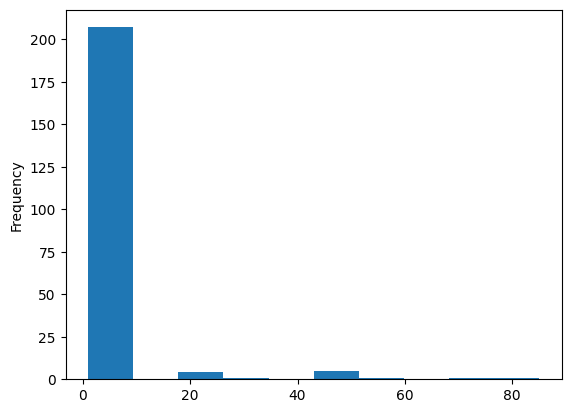

In [187]:
g = df[columns[-1]].value_counts()
g.plot.hist()

In [188]:
df['Value'].head(10)


0    100
1      9
2     13
3    119
4      7
5    123
6    216
7     10
8     13
9      2
Name: Value, dtype: int64